In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [4]:
xtrain.shape

(60000, 28, 28)

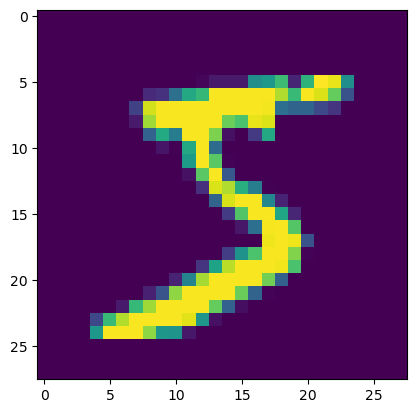

In [5]:
plt.imshow(xtrain[0])

In [7]:
num_pixels = xtrain.shape[1]*xtrain.shape[2]
num_pixels

784

In [8]:
xtrain=xtrain.reshape(xtrain.shape[0],num_pixels).astype('float32')
xtest=xtest.reshape(xtest.shape[0],num_pixels).astype('float32')
xtrain.shape,xtest.shape

((60000, 784), (10000, 784))

In [9]:
xtrain=xtrain/255
xtest=xtest/255

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

num_classes=ytest.shape[1]
print(num_classes)

In [12]:
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# build a neural Network

In [15]:
def classification_model():
    model=Sequential()
    model.add(Dense(num_pixels,activation='relu',input_shape=(num_pixels,)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

# train and test the Network

In [18]:
model=classification_model()
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10,verbose=2)
scores=model.evaluate(xtest,ytest,verbose=0)

Epoch 1/10
1875/1875 - 5s - loss: 0.1864 - accuracy: 0.9429 - val_loss: 0.1188 - val_accuracy: 0.9621 - 5s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.0785 - accuracy: 0.9752 - val_loss: 0.0918 - val_accuracy: 0.9733 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.0558 - accuracy: 0.9826 - val_loss: 0.0693 - val_accuracy: 0.9800 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0802 - val_accuracy: 0.9788 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.0953 - val_accuracy: 0.9727 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0754 - val_accuracy: 0.9818 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0801 - val_accuracy: 0.9812 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0945 - val_accuracy: 0.9792 - 4s/epoch - 2ms/step
Epoch 9/

In [19]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9797000288963318% 
 Error: 0.020299971103668213


In [22]:
model.save('classification_model.h5')

In [23]:
from keras.models import load_model

In [24]:
pretrained_model=load_model('classification_model.h5')